## Q-LEARNING 

### FrozenLake-v1
"The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile."
https://gym.openai.com/envs/FrozenLake-v0/ 

The below is Frozen Lake set to not be slippery. 

#### SUMMARY
Environment: The whole grid world including all squares e.g. 4x4 = 16 squares
State: One square
Agent: Can occupy one state at a time, can perform actions (up, down, left, right). As the agent travels and explores the environment it will work out th ebest policy.
Reward: +1 when finding the fisbee goal, -1 when falling in a hole.Can implement a negative reward eg -0.1 per step i.e. higher reward if reached faster.
Policy: Map & information about what action to take in a particular state. The best policy is to thake the best action in a particular state. Find a policy that allows agent to gain maxium reward.

###### Q-TABLE (reward table)
As the agent expolores, it records the best action to take for each state (square) in the Q-Table 
e.g. If you start in state C1 and the reward is at A1, it is best to move up when in square C1. From B1 it is then best to move up and get the reward at A1.

###### Goal: The way to choose the best action fr every state in the environment.
- Gym presets the reward ie cannot change reward to solve these problems. 
- You can change how the q-table is populated. You can change how the Q-table is calculated on each step. e.g. Keep track of the reward for each step and long term.

In [2]:
import sys

In [3]:
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install gym

In [4]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from gym.envs.toy_text.frozen_lake import generate_random_map

import matplotlib.pyplot as plt
import gc
gc.disable() #Disable automatic garbage collection.

In [5]:
env = gym.make('FrozenLake-v1', is_slippery=False)
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
num_episodes = 20000
max_steps_per_episode = 100

learning_rate = 0.2 #0.03 #Between 0 and 1. How quickly the agent abandons the previous value in the Q table for the new value. 0: Agent learns nothing and only uses prior knowledge. 1: Agent considers only the most recent information.
discount_rate = 0.98 #0.97

exploration_rate = 1
max_exploration_rate = 1    #1: Guaranteed that agent starts the game by 100% exploring the environment
min_exploration_rate = 0    #0: Agent does not explore at all. Agent only exploits (chooses actions to get max points)
exploration_decay_rate = 0.001

*** AVG reward per 1000 episodes***

1000 :  0.25000000000000017
2000 :  0.7300000000000005
3000 :  0.9030000000000007
4000 :  0.9750000000000008
5000 :  0.9900000000000008
6000 :  0.9960000000000008
7000 :  0.9980000000000008
8000 :  1.0000000000000007
9000 :  1.0000000000000007
10000 :  1.0000000000000007
11000 :  1.0000000000000007
12000 :  1.0000000000000007
13000 :  1.0000000000000007
14000 :  1.0000000000000007
15000 :  1.0000000000000007
16000 :  1.0000000000000007
17000 :  1.0000000000000007
18000 :  1.0000000000000007
19000 :  1.0000000000000007
20000 :  1.0000000000000007


 *** Q-table ***

[[0.88584238 0.9039208  0.9039208  0.88584238]
 [0.88584238 0.         0.92236816 0.9039208 ]
 [0.9039208  0.941192   0.9039208  0.92236816]
 [0.92236816 0.         0.90107115 0.89386837]
 [0.88022712 0.92236816 0.         0.88584238]
 [0.         0.         0.         0.        ]
 [0.         0.9604     0.         0.92236816]
 [0.         0.         0.         0.        ]
 [0.77997011 0.

(0.0, 1.0)

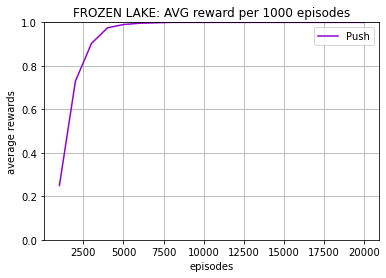

In [7]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    
    # random_map = generate_random_map(size=4, p=0.8)
    # env = gym.make("FrozenLake-v0", desc=random_map)
    env = gym.make('FrozenLake-v1', is_slippery=False)
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range (max_steps_per_episode):

        # Exploration / Exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done == True:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)

# Calculate reward across all episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 1000)
count = 1000
count_plot = [] #for plotting
r_plot = [] #for plotting
print("*** AVG reward per 1000 episodes***\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count_plot.append(count) #for plotting. 
    r_plot.append(sum(r/1000)) #for plotting
    count += 1000


# Print Q table
print("\n\n *** Q-table ***\n")
print(q_table)


#Plot results 
%matplotlib inline
#Name x-axis, y-axis and whole graph
plt.xlabel("episodes")
plt.ylabel("average rewards")
plt.title("FROZEN LAKE: AVG reward per 1000 episodes")
# Plotting all the graphs
plt.plot(count_plot, r_plot, color="darkviolet", label = "Push")
plt.grid()
plt.legend()
#Load the display window
plt.show
#set y-axis limit
plt.ylim([0, 1])

In [8]:
# random_map = generate_random_map(size=4, p=0.8)
# env = gym.make("FrozenLake-v0", desc=random_map)
env = gym.make('FrozenLake-v1', is_slippery=False)
for episode in range(10): #number of episodes played through - up to 20,000
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(0.5) #changed from 1

    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.1) #changed from 0.3
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(0.5) #changed from 3
            else:
                print("****You fell through a hole!****")
                time.sleep(0.5) #changed from 3
            clear_output(wait=True)
            break
            
        state = new_state
        
env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG
****You reached the goal!****
